In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Car_sales.csv")
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [3]:
df.shape

(157, 15)

In [4]:
print(df.head())

    Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          TL                             39.384              19.875   
2  Acura          CL                             14.114              18.225   
3  Acura          RL                              8.588              29.725   
4  Audi           A4                             20.397              22.255   

  Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
0    Passenger               21.5         1.8        140     101.2  67.3   
1    Passenger               28.4         3.2        225     108.1  70.3   
2    Passenger                  .         3.2        225     106.9  70.6   
3    Passenger                 42         3.5        210     114.6  71.4   
4    Passenger              23.99         1.8        150     102.6  68.2   

  Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
0

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [6]:
print(df.shape)
print("rows:",df.shape[0])
print("cols:",df.shape[1])

(157, 15)
rows: 157
cols: 15


In [7]:
df=df.drop_duplicates()
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [8]:
df.shape

(157, 15)

In [9]:
print("summary:",df.describe())

summary:        Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [10]:
print("the missing values count:\n",df.isnull().sum())

the missing values count:
 Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [11]:
missing=df.isnull().sum().idxmax()
df.drop(columns=[missing],inplace=True)
df.shape

(157, 14)

In [12]:
catcols=df.select_dtypes(include='object').columns
df.dropna(subset=catcols,inplace=True)
df.shape

(157, 14)

In [13]:
numcols=df.select_dtypes(include='number').columns
df[numcols]=df[numcols].fillna(df[numcols].mean())
df[numcols]

,Sales in thousands
0,16.919
1,39.384
2,14.114
3,8.588
4,20.397
...,...
152,3.545
153,15.245
154,17.531
155,3.493


In [14]:
df['Price in thousands']=pd.to_numeric(df['Price in thousands'],errors='coerce')
df=df.sort_values(by='Price in thousands',ascending=False)
print("mostexpensive:",df.iloc[0])
print("least expensive:",df.iloc[-1])

mostexpensive: Model                  CL500            
Sales in thousands                 0.954
4-year resale value                    .
Vehicle type                   Passenger
Price in thousands                  85.5
Engine size                            5
Horsepower                           302
Wheelbase                          113.6
Width                               73.1
Length                             196.6
Curb weight                        4.115
Fuel capacity                       23.2
Fuel efficiency                       20
Latest Launch                   4-Nov-15
Name: 99, dtype: object
least expensive: Model                  Town & Country   
Sales in thousands                 53.48
4-year resale value                19.54
Vehicle type                         Car
Price in thousands                   NaN
Engine size                            .
Horsepower                             .
Wheelbase                              .
Width                                  .
L

In [15]:
def min_max(column):
    return df[column].min(),df[column].max()

In [16]:
print("Horepower:",min_max('Horsepower'))
#print(df['Horsepower'].min())
print("Length:",min_max('Length'))
print("fuel efficiency:",min_max('Fuel efficiency'))

Horepower: ('.', '92')
Length: ('.', '224.5')
fuel efficiency: ('.', '45')


In [17]:

df['Horsepower']=pd.to_numeric(df['Horsepower'],errors="coerce")
print("Horepower:",min_max('Horsepower'))

Horepower: (55.0, 450.0)


In [18]:
continuous=df[["Price in thousands","Sales in thousands","Horsepower","Fuel efficiency"]]

<Axes: ylabel='Count'>

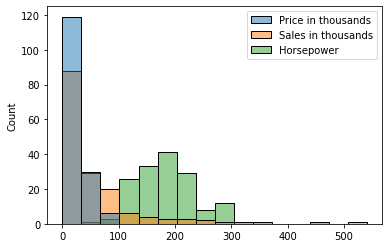

In [19]:
sns.histplot(continuous)

In [20]:
df['Length']=pd.to_numeric(df['Length'],errors="coerce")
df=df.dropna(subset=['Length'])

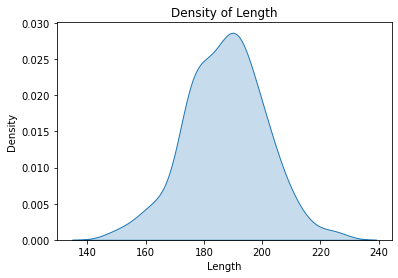

In [21]:

sns.kdeplot(df['Length'], fill=True)
plt.title("Density of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

In [22]:
df=pd.read_csv("Car_sales.csv")
df.columns=df.columns.str.strip() 
print(df.columns.tolist())

['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value', 'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency', 'Latest Launch']


In [23]:
print(df['Manufacturer'].value_counts())

Manufacturer
Dodge            11
Ford             11
Toyota            9
Chevrolet         9
Mercedes-Benz     9
Mitsubishi        7
Nissan            7
Chrysler          7
Volvo             6
Oldsmobile        6
Lexus             6
Mercury           6
Pontiac           6
Volkswagen        6
Saturn            5
Cadillac          5
Honda             5
Plymouth          4
Acura             4
Buick             4
Audi              3
Jeep              3
Porsche           3
Hyundai           3
BMW               3
Lincoln           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: count, dtype: int64


In [24]:
numcols=df.select_dtypes(include=['number'])
numcols

,Sales in thousands
0,16.919
1,39.384
2,14.114
3,8.588
4,20.397
...,...
152,3.545
153,15.245
154,17.531
155,3.493


In [25]:
df["Price in thousands"]=pd.to_numeric(df["Price in thousands"],errors="coerce")
print(df["Price in thousands"].corr(df["Sales in thousands"]))

-0.3047344541294122


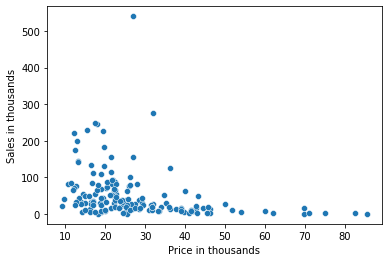

In [26]:
sns.scatterplot(x='Price in thousands',y='Sales in thousands',data=df)
plt.show()

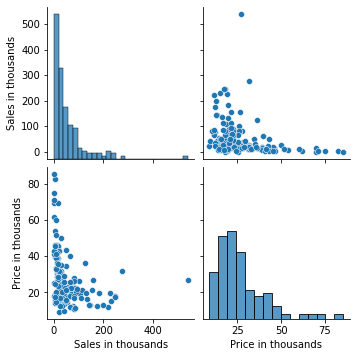

In [27]:
sns.pairplot(df)
plt.show()

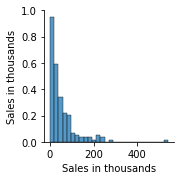

In [28]:
sns.pairplot(numcols)

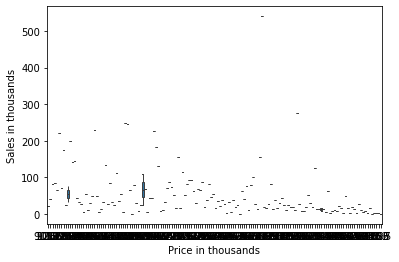

In [29]:
sns.boxplot(x='Price in thousands',y='Sales in thousands',data=df)
#plt.xticks(rotation=45)
plt.show()

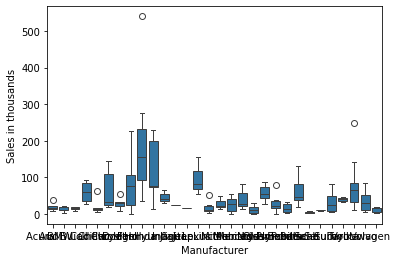

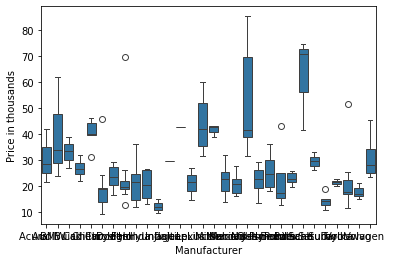

In [30]:
for col in df.select_dtypes(include=['number']).columns:
     sns.boxplot(x='Manufacturer',y=col,data=df)
     plt.show()

In [31]:
y=df['Sales in thousands']
x=df.drop(columns=["Sales in thousands"])

In [32]:
df.columns.tolist()

['Manufacturer',
 'Model',
 'Sales in thousands',
 '4-year resale value',
 'Vehicle type',
 'Price in thousands',
 'Engine size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb weight',
 'Fuel capacity',
 'Fuel efficiency',
 'Latest Launch']

In [33]:
categorical=df.select_dtypes(include='object').columns.tolist()
categorical.remove('Vehicle type')
le=LabelEncoder()

for col in categorical:
    df[col]=le.fit_transform(df[col])
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,0,79,16.919,53,Passenger,21.50,4,17,5,9,15,18,8,14,42
1,0,143,39.384,70,Passenger,28.40,16,50,36,32,83,91,29,11,112
2,0,25,14.114,63,Passenger,NaN,16,50,29,35,80,85,29,12,0
3,0,115,8.588,87,Passenger,42.00,19,44,56,40,97,113,32,8,94
4,1,8,20.397,78,Passenger,23.99,4,22,9,16,34,39,23,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,0,Passenger,24.40,5,26,2,12,27,42,19,11,53
153,29,125,15.245,0,Passenger,27.50,9,30,19,24,59,60,31,11,67
154,29,149,17.531,0,Passenger,28.80,9,30,19,24,61,66,31,11,71
155,29,24,3.493,0,Passenger,45.50,8,53,19,41,57,102,34,9,74


In [34]:

df=pd.get_dummies(df,columns=['Vehicle type'],drop_first=True)
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Vehicle type_Passenger
0,0,79,16.919,53,21.50,4,17,5,9,15,18,8,14,42,True
1,0,143,39.384,70,28.40,16,50,36,32,83,91,29,11,112,True
2,0,25,14.114,63,NaN,16,50,29,35,80,85,29,12,0,True
3,0,115,8.588,87,42.00,19,44,56,40,97,113,32,8,94,True
4,1,8,20.397,78,23.99,4,22,9,16,34,39,23,13,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,0,24.40,5,26,2,12,27,42,19,11,53,True
153,29,125,15.245,0,27.50,9,30,19,24,59,60,31,11,67,True
154,29,149,17.531,0,28.80,9,30,19,24,61,66,31,11,71,True
155,29,24,3.493,0,45.50,8,53,19,41,57,102,34,9,74,True


In [35]:
from sklearn.model_selection import train_test_split
y=df['Sales in thousands']
x=df.drop(columns=['Sales in thousands'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit on training set, transform both train and test
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Vehicle type_Passenger
0,0,79,16.919,53,21.50,4,17,5,9,15,18,8,14,42,True
1,0,143,39.384,70,28.40,16,50,36,32,83,91,29,11,112,True
2,0,25,14.114,63,NaN,16,50,29,35,80,85,29,12,0,True
3,0,115,8.588,87,42.00,19,44,56,40,97,113,32,8,94,True
4,1,8,20.397,78,23.99,4,22,9,16,34,39,23,13,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,0,24.40,5,26,2,12,27,42,19,11,53,True
153,29,125,15.245,0,27.50,9,30,19,24,59,60,31,11,67,True
154,29,149,17.531,0,28.80,9,30,19,24,61,66,31,11,71,True
155,29,24,3.493,0,45.50,8,53,19,41,57,102,34,9,74,True
